# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways: 




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

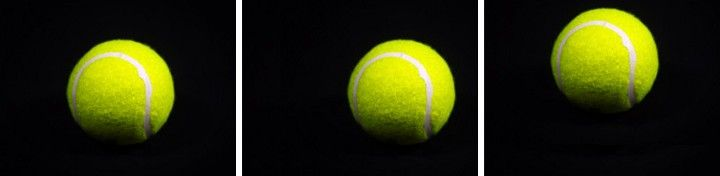



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [105]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python image library
from urllib.request import urlopen #Lets you read an email address

First we upload an image from the internet

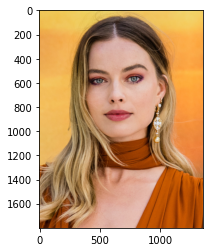

In [68]:
url = 'https://es.web.img3.acsta.net/pictures/19/11/12/22/54/0812791.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


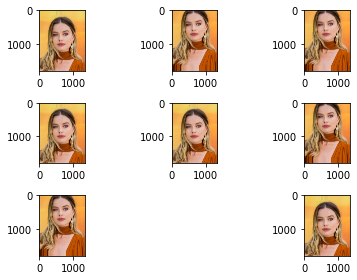

In [69]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(height_shift_range=[-150,150])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #it is converted to a valid value to be able to display it as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to invert the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The increase is specified by a Boolean argument **horizontal_flip** o **vertical_flip** for the class **ImageDataGenerator**.

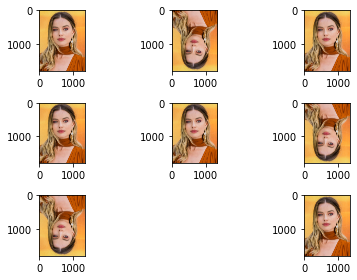

In [70]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly randomly sampled from the zoom region for each dimension (width, heigth) separately.

Float or [lower limit, upper limit]. Random zoom range. If it is a floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

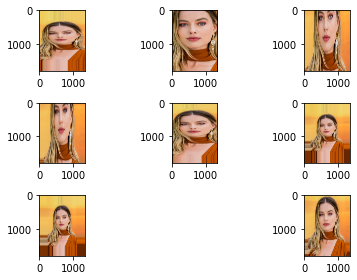

In [71]:
datagen = ImageDataGenerator(zoom_range=0.59) #float or Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside the image frame, leaving areas of the frame with no pixel data, which need to be filled.

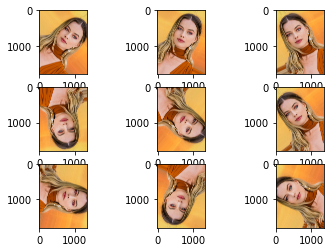

In [72]:
datagen = ImageDataGenerator(rotation_range=270)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

#Shear Range
Shear Intensity (Shear angle in counter-clockwise direction in degrees)

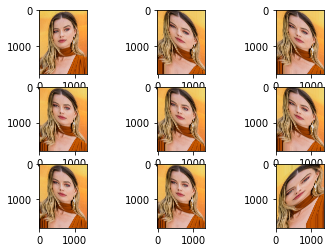

In [83]:
datagen = ImageDataGenerator(shear_range=50)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

#Channel Shift Range

 Range for random channel shifts

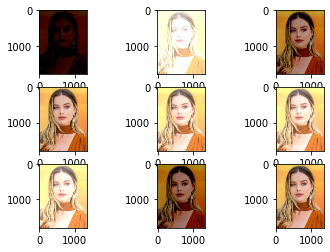

In [87]:
datagen = ImageDataGenerator(channel_shift_range= 200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

#Fill Mode:

One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode: - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) - 'nearest': aaaaaaaa|abcd|dddddddd - 'reflect': abcddcba|abcd|dcbaabcd - 'wrap': abcdabcd|abcd|abcdabcd 

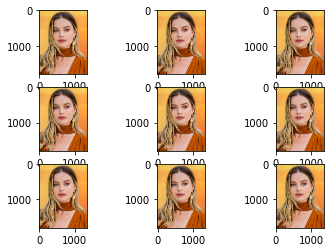

In [91]:
datagen = ImageDataGenerator(fill_mode= "wrap")
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the accuracy of the job.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center**: Boolean, set the mean of each sample to zero
              featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boleano, indicates if bleaching is applied ZCA.      

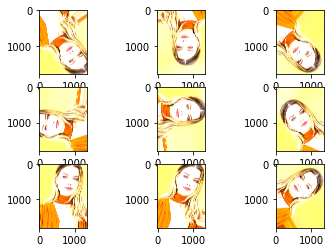

In [80]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [130,130],   
            height_shift_range           = [180,180],   
            horizontal_flip              = True,   
            vertical_flip                = True,
            brightness_range             = [2,2], # With this function we can adjust the brightness through a range 
            shear_range                  = 50) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not that simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following :


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [108]:
!pip install textattack

In [109]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [110]:
text = "When you're going out with us?, you left us waiting the other time. I bothered that day"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augment the text by replacing it with synonyms from the thesaurus (dictionary of synonyms) of WordNet.

WordNet is a lexical database of English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus, grouping words based on their meaning.



In [111]:
aug = WordNetAugmenter();
aug.augment(text)

["When you're going out with us?, you left us waiting the other sentence. I bothered that day"]


## EmbeddingAugmenter
 Augments text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0,8.


In [112]:
aug = EmbeddingAugmenter();
aug.augment(text)

["When you're going out with us?, you left us hoping the other time. I bothered that day"]

## CharSwapAugmenter
Increase text by substituting, deleting, inserting, and swapping adjacent characters.

In [113]:
aug = CharSwapAugmenter()
aug.augment(text)

["When you're going out with us?, you left us waiting the other time. I bothered that daSy"]


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [114]:
aug = EasyDataAugmenter()
aug.augment(text)

["When you're going out with us?, you left us await the other time. I bothered that day",
 "When you're going out with?, you left us waiting the other time. I bothered that day",
 "When you're going out with us?, the left us waiting you other time. I bothered that day",
 "When you're going out with us U?, you left us waiting the other time. I bothered that day"]

Googletrans  uses the Google Translate Ajax API for language detection and translation.

The key parameters for the method **translate ()** are:



1.   **src**: Source language. this parameter is optional since **googletrans** will detect it.
2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Supported languages ​​can be found in https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages:


*   Afrikáans	'af'

*   Chinese (simplified) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'
*   Latin	'la'


*   Spanish	'es'


*   Turkmen	'tk'


*   Yiddish	'yi'

*   Zulu	'zu'



In [115]:
!pip install googletrans

In [116]:
from googletrans import Translator
translator = Translator()

In [117]:
origin_text = "Never stop trying, if it was easy it wouldn't be worth it."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='zh-CN').text
print(origin_text)
print(text_trans)
print(final)

Never stop trying, if it was easy it wouldn't be worth it.
Nunca dejes de intentarlo, si fuera fácil no valdría la pena.
永远不要停止尝试，如果这很容易，那是不值得的。
